# AUTHOR : HAMORA HADI
Preduct Health Costs with Regression<br>
Return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

In [1]:
#import the libraries!
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
dataset_path = keras.utils.get_file("insurance.csv", "http://cox.csueastbay.edu/~esuess/classes/Statistics_6620/Presentations/ml10/insurance.csv")
dataset = pd.read_csv(dataset_path)
dataset.tail()

57344/50264 [==================================] - 0s 3us/step


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
catColumns = ['sex', 'smoker', 'region']
dataset = pd.get_dummies(dataset, columns = catColumns, drop_first=True)
dataset.tail()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1
1337,61,29.1,0,29141.36,0,1,1,0,0


In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("expenses")

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
sex_male,1070.0,0.498131,0.500230,0.0,0.0,0.0,1.0,1.0
smoker_yes,1070.0,0.199065,0.399484,0.0,0.0,0.0,0.0,1.0
region_northwest,1070.0,0.235514,0.424518,0.0,0.0,0.0,0.0,1.0
region_southeast,1070.0,0.281308,0.449848,0.0,0.0,0.0,1.0,1.0
region_southwest,1070.0,0.234579,0.423934,0.0,0.0,0.0,0.0,1.0


In [9]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [10]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  
train_dataset = norm(train_dataset)
test_dataset = norm(test_dataset)

In [11]:
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

In [12]:
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:301855072.0000,  mae:12711.3213,  mse:301855072.0000,  val_loss:363230592.0000,  val_mae:14425.4385,  val_mse:363230592.0000,  
....................................................................................................
Epoch: 100, loss:30754472.0000,  mae:3685.6052,  mse:30754472.0000,  val_loss:35950424.0000,  val_mae:4073.5210,  val_mse:35950424.0000,  
....................................................................................................
Epoch: 200, loss:27750600.0000,  mae:3405.2039,  mse:27750600.0000,  val_loss:32480078.0000,  val_mae:3759.5481,  val_mse:32480078.0000,  
....................................................................................................
Epoch: 300, loss:23856326.0000,  mae:3005.5564,  mse:23856326.0000,  val_loss:27956002.0000,  val_mae:3281.6470,  val_mse:27956002.0000,  
....................................................................................................
Epoch: 400, loss:21196298.0000,  ma

Text(0, 0.5, 'Mean Abs Error (expenses)')

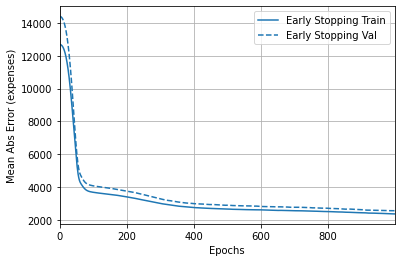

In [13]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Early Stopping': history}, metric = "mae")
plt.ylabel('Mean Abs Error (expenses)')